In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls /content/drive/MyDrive/


 archive/          AudioFiles.zip     'Hadia Record.gsheet'   Resume.pdf    val/
 archive.zip      'Colab Notebooks'/   i21-1760_A_05_N.docx   test/         yolov5/
 AudioFiles2.zip   data/              'i21-1760_N (1).docx'   test.cache
 AudioFiles3.zip   gil_project.rar     MAIN/                  test_image/


In [ ]:
# dataset_path = '/content/drive/MyDrive/AI_dataset'


# Data augmentation

Reading the images

## Getting yolo v5

In [ ]:
%pwd

'/content'

In [ ]:
cd yolov5

/content


In [ ]:
# !git clone https://github.com/WongKinYiu/yolov7.git
!git clone https://github.com/ultralytics/yolov5.git



Cloning into 'yolov5'...
remote: Enumerating objects: 16582, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 16582 (delta 30), reused 39 (delta 18), pack-reused 16522
Receiving objects: 100% (16582/16582), 15.06 MiB | 11.76 MiB/s, done.
Resolving deltas: 100% (11389/11389), done.
Updating files: 100% (148/148), done.


In [ ]:
%ls /content/yolov5

cfg/     detect.py  hubconf.py  models/    requirements.txt  tools/        utils/
data/    export.py  inference/  paper/     scripts/          train_aux.py
deploy/  figure/    LICENSE.md  README.md  test.py           train.py


In [ ]:
%cd yolov5

/content/yolov7


In [ ]:
train_path = "/content/drive/MyDrive/MAIN"
test_path = "/content/drive/MyDrive/val"

data_yaml = """
train: /content/drive/MyDrive/MAIN
val: /content/drive/MyDrive/val

nc: 4
names: ['bowl', 'spoon','cup','plate']
"""

# Create data.yaml file
with open("data.yaml", "w") as f:
    f.write(data_yaml)

# Start training


In [ ]:
# !python train.py --weights /content/drive/MyDrive/yolov7_training.pt --data "data/custom.yaml" --workers 8 --epochs 50 --batch-size 8 --img 416 --cfg cfg/training/yolov7.yaml --name yolov7 --hyp data/hyp.scratch.p5.yaml
!python train.py --img 640 --batch 16 --epochs 100 --data data.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --cache



2024-05-06 13:25:19.392111: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 13:25:19.392157: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 13:25:19.393471: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-06 13:25:19.400707: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 13:25:20.501168: W tensorflow/comp

In [ ]:
# !python detect.py --source /content/drive/MyDrive/data/images/IMG_20240430_194848.jpg --weights /content/yolov7/runs/train/yolov7/weights/best.pt
!python /content/drive/MyDrive/yolov5/detect.py --source /content/drive/MyDrive/bowl_cup.jpg --weights /content/drive/MyDrive/yolov5/runs/train/exp/weights/best.pt --conf 0.1 --iou 0.1 --save-conf --exist-ok


detect: weights=['/content/drive/MyDrive/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/bowl_cup.jpg, data=drive/MyDrive/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.1, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/yolov5/runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-307-g920c721e Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/content/drive/MyDrive/yolov5/detect.py", line 312, in <module>
    main(opt)
  File "/content/drive/MyDrive/yolov5/detect.py", line 307, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/uti

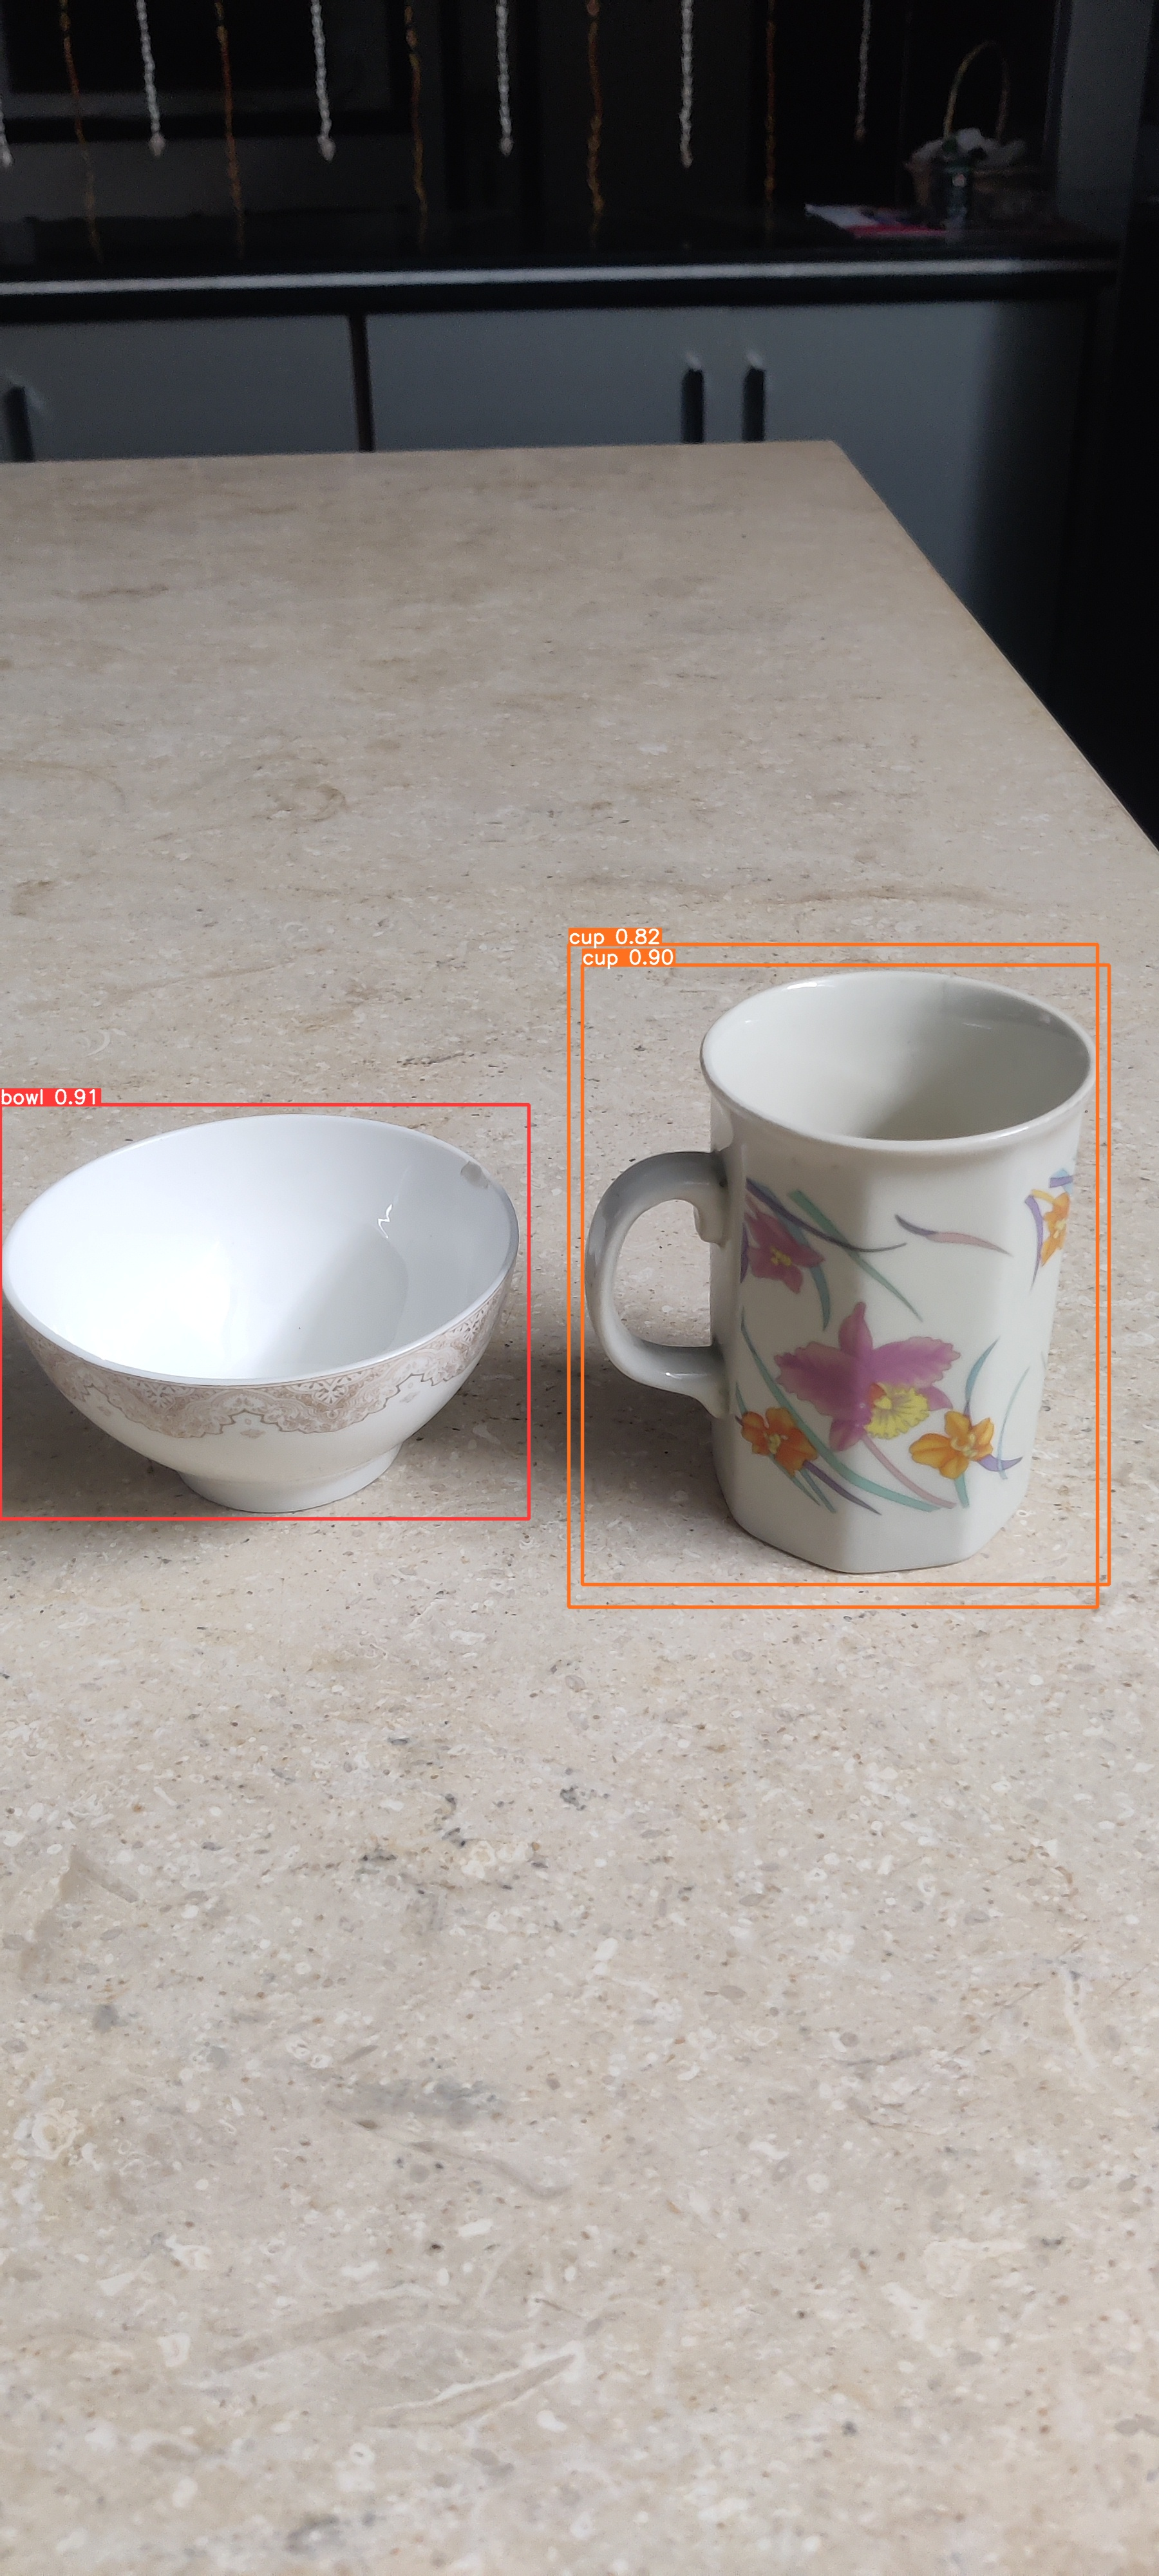

In [ ]:
from IPython.display import Image, display

# Adjust the path to match where your image is saved
image_path = '/content/drive/MyDrive/yolov5/runs/detect/exp/bowl_cup.jpg'

# Display the image
display(Image(filename=image_path))


In [ ]:
%ls  /content/drive/MyDrive/yolov5/runs/detect/exp


cup.jpg  mug.jpg


In [ ]:
!export PYTHONPATH="$PYTHONPATH:/content/drive/MyDrive/yolov5"
